<a href="https://colab.research.google.com/github/hydro-7/Cat_v_Dog_Classification/blob/main/Day_v_Night_RESNET18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/train.zip -d /content/

Archive:  /content/train.zip
   creating: /content/train/
  inflating: /content/train/day.0.jpg  
  inflating: /content/train/day.1.jpg  
  inflating: /content/train/day.10.jpg  
  inflating: /content/train/day.100.jpg  
  inflating: /content/train/day.101.jpg  
  inflating: /content/train/day.102.jpg  
  inflating: /content/train/day.103.jpg  
  inflating: /content/train/day.104.jpg  
  inflating: /content/train/day.105.jpg  
  inflating: /content/train/day.106.jpg  
  inflating: /content/train/day.107.jpg  
  inflating: /content/train/day.108.jpg  
  inflating: /content/train/day.109.jpg  
  inflating: /content/train/day.11.jpg  
  inflating: /content/train/day.110.jpg  
  inflating: /content/train/day.111.jpg  
  inflating: /content/train/day.112.jpg  
  inflating: /content/train/day.113.jpg  
  inflating: /content/train/day.114.jpg  
  inflating: /content/train/day.115.jpg  
  inflating: /content/train/day.116.jpg  
  inflating: /content/train/day.117.jpg  
  inflating: /content/tr

In [2]:
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets, models

import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import shutil

import requests
import zipfile
from pathlib import Path
from torch.utils.data import random_split

seed = 42

In [3]:
image_path = Path("train")

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print("Khel khatam")

train directory exists.


Image class: day


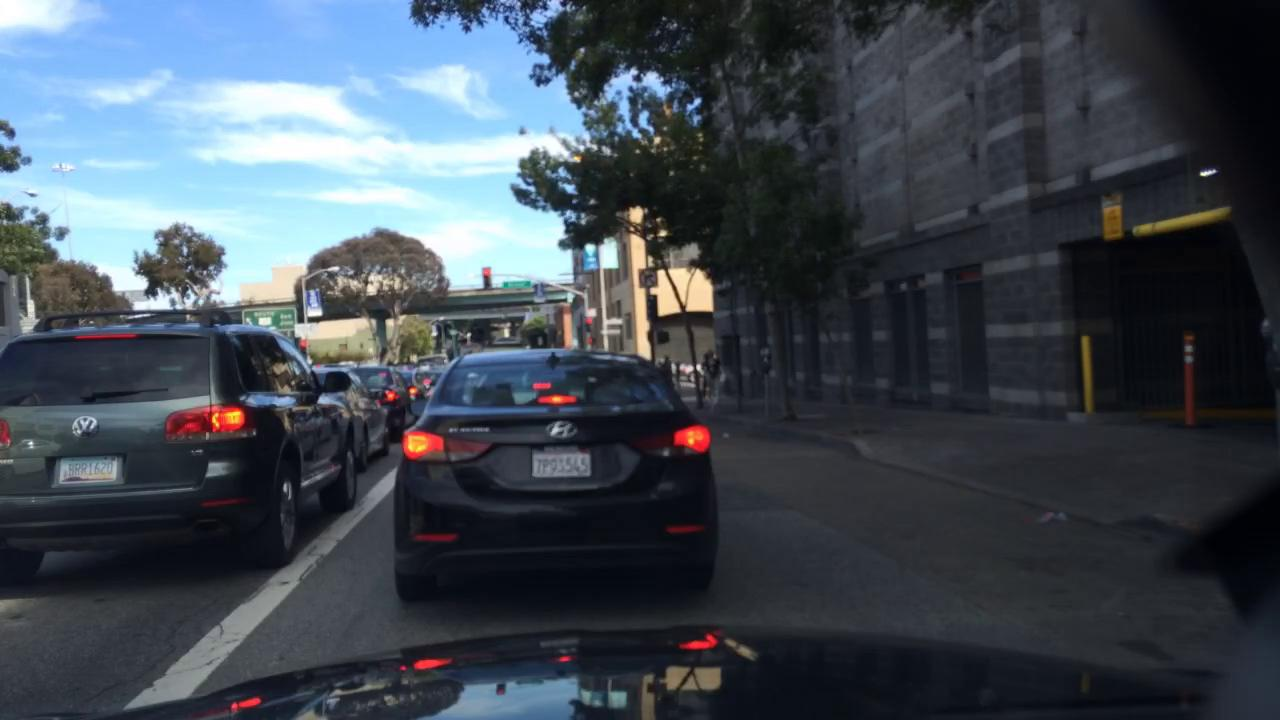

In [4]:
import random
from PIL import Image

random.seed(seed)

# image_path_list = list(image_path.glob("*/*/*.jpg")) #error
# image_path_list = list(image_path.glob("*/*.jpg")) #error
image_path_list = list(image_path.glob("*.jpg")) # (* means "any combination"), Gets all image paths into the image_path_list

random_image_path = random.choice(image_path_list)

#image_class = random_image_path.parent.stem #parent stem is train dir, so image class = train
image_class = random_image_path.name.split(".")[0] # The images are of the form dog.0.jpg or cat.0.jpg

img = Image.open(random_image_path)


print(f"Image class: {image_class}")

img

In [5]:
data_transform = transforms.Compose([  transforms.Resize(size=(64, 64))  , transforms.RandomHorizontalFlip(p=0.5)  , transforms.ToTensor() ,  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Flip the images randomly on the horizontal, p = probability of flip, 0.5 = 50% chance

# To Tensor also converts all pixel values from 0 to 255 to be between 0.0 and 1.0

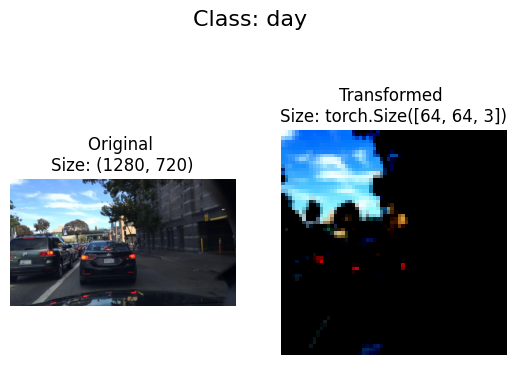

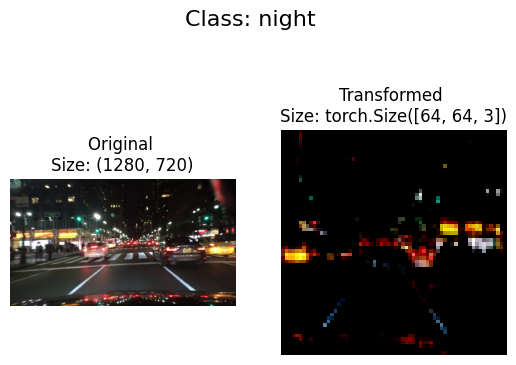

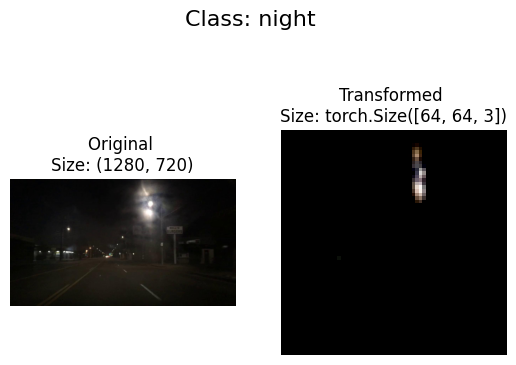

In [6]:
# Imported from CNN_Intro_1.ipynb

def plot_transformed_images(image_paths, transform, n=3, seed=42):

    # Plots a series of random images from image_paths.

    # Will open n image paths from image_paths, transform them
    # with transform and plot them side by side.

    # Args:
    #     image_paths (list): List of target image paths.
    #     transform (PyTorch Transforms): Transforms to apply to images.
    #     n (int, optional): Number of images to plot. Defaults to 3.
    #     seed (int, optional): Random seed for the random generator. Defaults to 42.

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            str1 = image_path.name.split(".")[0]
            fig.suptitle(f"Class: {str1}", fontsize=16)


plot_transformed_images(image_path_list,  transform=data_transform,  n=3)
# image_path_list -> all images

In [7]:
train_folder = 'train'
df = 'day'
nf = 'night'

In [8]:
day_folder = os.path.join(train_folder, df)
os.makedirs(day_folder, exist_ok=True)

In [9]:
night_folder = os.path.join(train_folder, nf)
os.makedirs(night_folder, exist_ok=True)

In [10]:
for source_path in image_path_list:
    image_class = source_path.name.split(".")[0]
    if image_class == "day":
        # destination_path = os.path.join(nf1, source_path.name)
        destination_path = day_folder
    else:
        # destination_path = os.path.join(nf2, source_path.name)
        destination_path = night_folder
    shutil.move(source_path, destination_path)

In [11]:
# data_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
# ])

# Check if images have been correctly stored into Cat & Dog folder

dataset = torchvision.datasets.ImageFolder(root=train_folder, transform=data_transform)
print(dataset.class_to_idx)
idx_to_class = {v:k for k,v in dataset.class_to_idx.items()}

{'day': 0, 'night': 1}


In [12]:
data_size = len(dataset)
# Random split dataset
train_dataset, validation_dataset = random_split(dataset, [int(0.8 * data_size), int(0.2 * data_size)])

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=1, shuffle=True)

torch.Size([1, 3, 64, 64])
It is day in this image.


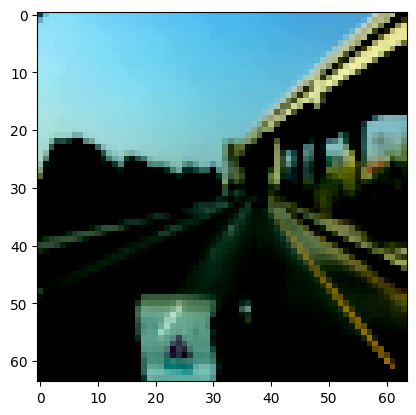

In [13]:
for value in train_dataloader:
    data, label = value
    print(data.shape)
    print(f"It is {idx_to_class[int(label.item())]} in this image.")
    plt.imshow(torch.squeeze(data).permute(1, 2, 0))
    break

In [14]:
# my laptop doesnt have cuda, so only runs with cpu

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [30]:
def train_nn(model, train_dataloader, validation_dataloader, loss_fn, optimizer, n_epochs):
  print("Training the model")
  for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}")
    model.train()
    running_loss = 0.0
    running_correct = 0.0
    total = 0

    for data in train_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        total += labels.size(0)

        optimizer.zero_grad()

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)

        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        running_correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_acc = 100.0 * running_correct / total

    print(f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%")

    evaluate_model_on_validation_set(model, validation_dataloader)

  print("finished")
  return model

In [31]:
def evaluate_model_on_validation_set(model, validation_dataloader):
  print("Evaluating the model")
  model.eval()
  predicted_correctly_on_epoch = 0
  total = 0
  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      total += labels.size(0)
      outputs = model(inputs)
      _, predicted = torch.max(outputs.data, 1)
      predicted_correctly_on_epoch += (predicted == labels).sum().item()
  epoch_acc = 100.0 * predicted_correctly_on_epoch / total

  print(f"Validation Acc: {epoch_acc:.2f}%")

In [32]:
resnet18_model = models.resnet18(pretrained=False) # starts with random weights, to make from scratch

num_ftrs = resnet18_model.fc.in_features
number_of_classes = 2

resnet18_model.fc = nn.Linear(num_ftrs, number_of_classes) # prepares the req matrices for forward propogation
resnet18_model = resnet18_model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18_model.parameters(), lr=0.01, momentum = 0.9, weight_decay = 0.003) # Stochastic gradient descent, and if you specify the batch size, it will apply mini batch gradient descent algorithm for you
# optimizer = optim.Adam(resnet18_model.parameters(), lr=0.001) # Adam optimizer
# lr = learning rate, try 0.01 & 0.001
# momentum helps accelerate the descent
# weight decay helps prevent overfitting

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [33]:
train_nn(resnet18_model, train_dataloader, validation_dataloader, loss_fn, optimizer, 15)

Training the model
Epoch 1
Train Loss: 2.2269, Train Acc: 76.00%
Evaluating the model
Validation Acc: 80.00%
Epoch 2
Train Loss: 0.3877, Train Acc: 88.60%
Evaluating the model
Validation Acc: 52.80%
Epoch 3
Train Loss: 0.2068, Train Acc: 93.60%
Evaluating the model
Validation Acc: 53.60%
Epoch 4
Train Loss: 0.1870, Train Acc: 93.80%
Evaluating the model
Validation Acc: 85.60%
Epoch 5
Train Loss: 0.1579, Train Acc: 93.60%
Evaluating the model
Validation Acc: 85.60%
Epoch 6
Train Loss: 0.1742, Train Acc: 94.80%
Evaluating the model
Validation Acc: 67.20%
Epoch 7
Train Loss: 0.2130, Train Acc: 92.80%
Evaluating the model
Validation Acc: 57.60%
Epoch 8
Train Loss: 0.1971, Train Acc: 92.20%
Evaluating the model
Validation Acc: 51.20%
Epoch 9
Train Loss: 0.1928, Train Acc: 92.80%
Evaluating the model
Validation Acc: 84.00%
Epoch 10
Train Loss: 0.1350, Train Acc: 96.40%
Evaluating the model
Validation Acc: 86.40%
Epoch 11
Train Loss: 0.1960, Train Acc: 93.60%
Evaluating the model
Validation A

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  